## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
import nltk
from nltk.corpus import stopwords

## Importing DataFrame

In [3]:
df = pd.read_csv('../data/final_data.csv')
display(df.head(),df.shape)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,emoji_count,country
0,1590841293047201797,1590841293047201797,2022-11-11 06:58:15 PST,2022-11-11,06:58:15,800,350172089,dyadav79,dyadav@gmail.com,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India
1,1590809231175057409,1590809231175057409,2022-11-11 04:50:51 PST,2022-11-11,04:50:51,800,1421192870,shamitaharsh,Shamita Harsh,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India
2,1590779888348573696,1590779888348573696,2022-11-11 02:54:15 PST,2022-11-11,02:54:15,800,1356150453277323264,shivam_dwivedii,Shivam Dwivedi,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India
3,1590772740008517632,1590769151110705152,2022-11-11 02:25:51 PST,2022-11-11,02:25:51,800,1585136338201821184,tanzil_mansuri1,Tanzil Mansuri,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'SophiaKianni', 'name': 'Soph...",NaN,NaN,NaN,NaN,0,India
4,1590746473347571719,1590746473347571719,2022-11-11 00:41:28 PST,2022-11-11,00:41:28,800,487662656,swatibhalla23,Swati Bhalla,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0,India


(62751, 38)

In [ ]:
df.columns

## Additional Data Cleaning

In [4]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split

df['tokenized_text']=df['tweet'].apply(lambda x: tokenize(x.lower()))

In [5]:
new_stopwords = ['https', 't', 'co', 'cleandelhi', 'swachhbharat', 'mycleanindia', 'globalwarming', 'shramdaan', 'wedonthavetime',
                 'climateemergency', 'swachhatahiseva', 'climatechange', 'savesoilsaveme', 'wethechangenow', 'sadhgurujv',
                'savesoildelhi', 'november', 'today', 'model', 'business', 'first', 'clean', 'sunday', 'volunteer', 'visit', 'day', 
                 'human', 'needed', 'book', 'nice', 'part', 'zero', 'tomorrow' , 'energy', 'issue', 'vote', 'impact', 'people',
                'world', 'volunteer', 'leader', 'nation', 'crisis', 'wedonthavetime', 'nation', 'impact', 'right', 'action',
                'conference', 'government', 'dont', 'believe', 'time', 'countries', 'year', 'state', 'wemeantoclean']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [6]:
def remove_stopwords(text):
    text=[word for word in text if word not in stpwrd]
    return text

df['clean']=df['tokenized_text'].apply(lambda x: remove_stopwords(x))

In [7]:
df['clean_text'] = df['clean'].str.join(" ")
df[['clean_text']]

,clean_text
0,talking alternate sources shifting renewable g...
1,story climate conflict brought trafficking sun...
2,climate change reduced date production blockad...
3,sophiakianni unicef needs take legal towards ...
4,us e jmo nolq volunteering delhi delhincr clim...
...,...
62746,called consumers withdraw stop banking compani...
62747,youth cop climate change threat future young c...
62748,guessing live michigan crime effect daily lif...
62749,cop climate change framed battle survival nwog...


In [8]:
tweets = df[['clean_text', 'country']]
tweets

,clean_text,country
0,talking alternate sources shifting renewable g...,India
1,story climate conflict brought trafficking sun...,India
2,climate change reduced date production blockad...,India
3,sophiakianni unicef needs take legal towards ...,India
4,us e jmo nolq volunteering delhi delhincr clim...,India
...,...,...
62746,called consumers withdraw stop banking compani...,USA
62747,youth cop climate change threat future young c...,USA
62748,guessing live michigan crime effect daily lif...,USA
62749,cop climate change framed battle survival nwog...,USA


## Resampling of Dataset

In [11]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_md")

## ASEAN ENTITIES

In [10]:
asean = ['Malaysia', 'Indonesia', 'Philippines', 'Vietnam', 'Thailand']

tweets_asean = tweets[tweets['country'].isin(asean)]
tweets_asean

,clean_text,country
8923,icfp live stage feature short partner driven s...,Indonesia
8924,global warming climate change,Indonesia
8925,secure land tenure increases resiliency famili...,Indonesia
8926,sophiakianni cop p climate change real happen...,Indonesia
8927,water populated regions around natural disaste...,Indonesia
...,...,...
27476,cop climate summit scientists watching grapple...,Vietnam
27477,singapore airlines said committed achieving ne...,Vietnam
27478,paris climate change impacts battering vulnera...,Vietnam
27479,many emerging economies least blame fossil fue...,Vietnam


In [11]:
tweets_asean = tweets_asean.sample(frac=0.7, replace=True, random_state=1)
tweets_asean

,clean_text,country
24488,adb partnered scale investments innovative tra...,Vietnam
9158,climate fatalist everything bad late make mean...,Indonesia
23311,ag prajuck dag klednatee join official launch ...,Vietnam
15514,lockyswift yeah true lol well climate change ...,Philippines
27266,another victim climate change,Vietnam
...,...,...
24722,yes grow wonderfully climate zones,Vietnam
24754,hundreds join cycling event address climate ch...,Vietnam
12831,united states strongly supports extractive ind...,Philippines
24140,full years important summit climate change kno...,Vietnam


In [12]:
nlp.max_length = 2000000
tokens = nlp(''.join(str(tweets_asean.clean_text.tolist())))

In [13]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('egypt', 780),
 ('philippines', 352),
 ('un', 291),
 ('one', 250),
 ('sharm el sheikh', 211),
 ('monday', 178),
 ('asia', 171),
 ('thailand', 139),
 ('sharm el', 131),
 ('china', 113),
 ('wednesday', 100),
 ('jeegeronimo', 98),
 ('indonesia', 96),
 ('philippine', 94),
 ('pakistan', 93),
 ('apec', 82),
 ('marcos', 82),
 ('two', 82),
 ('ukraine', 78),
 ('tuesday', 75)]

In [14]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        org_list.append(ent.text)
        
ent_counts = Counter(org_list).most_common(10)
df_person_asean = pd.DataFrame(ent_counts, columns =['text', 'count'])

In [15]:
df_person_asean

,text,count
0,jeegeronimo,98
1,marcos,82
2,jdhze yjhx,51
3,thegreenreport jee,46
4,geronimo iya gozum,46
5,ivan enrile,46
6,antonio guterres,43
7,rishi sunak,40
8,tamayo,37
9,marcos jr,37


In [17]:
df_person_asean.to_csv('person_df/person_asean.csv')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Entities', title = 'Most Mentioned Entities')

## US ENTITIES

In [18]:
us = ['USA']

tweets_us = tweets[tweets['country'].isin(us)]
tweets_us

,clean_text,country
27481,votefordemocracy womensrights womenshealthcar...,USA
27482,shared impulse protect young vulnerable could...,USA
27483,global warming fixed santa early tweet bogus,USA
27484,economy terrible globally us comparatively gr...,USA
27485,blend sympathetic characters riveting plot vib...,USA
...,...,...
62746,called consumers withdraw stop banking compani...,USA
62747,youth cop climate change threat future young c...,USA
62748,guessing live michigan crime effect daily lif...,USA
62749,cop climate change framed battle survival nwog...,USA


In [21]:
tweets_us = tweets_us.sample(frac=0.55, replace=True, random_state=1)
tweets_us

,clean_text,country
57587,hot isnt anyone anything climate change rich a...,USA
46706,us climate change envoy john kerry said invest...,USA
43453,spent long weekend boomer fil defending covid...,USA
39541,advancing climate change health adaptation imp...,USA
56945,cop egypt going helpful review data chazenseni...,USA
...,...,...
37506,happens global warming us army corps engineers...,USA
27806,canadian doctors target health effects climate...,USA
41654,anyone care elections consequences power reme...,USA
30052,macron urges us china pay fair share climate c...,USA


In [22]:
nlp.max_length = 2000000
tokens = nlp(''.join(str(tweets_us.clean_text.tolist())))

In [23]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('egypt', 346),
 ('one', 324),
 ('republicans', 307),
 ('florida', 264),
 ('democrats', 150),
 ('republican', 126),
 ('un', 120),
 ('americans', 113),
 ('gop', 107),
 ('winter', 105),
 ('american', 101),
 ('ukraine', 98),
 ('china', 94),
 ('nyc', 90),
 ('billion', 85),
 ('new york', 78),
 ('million', 73),
 ('africa', 69),
 ('two', 68),
 ('congress', 68)]

In [24]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        org_list.append(ent.text)
        
ent_counts = Counter(org_list).most_common(10)
df_person_us = pd.DataFrame(ent_counts, columns =['text', 'count'])

In [25]:
df_person_us

,text,count
0,biden,63
1,rainn wilson,59
2,john kerry,47
3,al gore,37
4,rishi sunak,21
5,ron johnson,20
6,joe biden,18
7,kerry,16
8,kyrgyzstan,16
9,op ed ',16


In [28]:
df_person_us.to_csv('person_df/person_us.csv')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Entities', title = 'Most Mentioned Entities in the US')

## Other Entities

In [29]:
others = ['Japan', 'Iran', 'Russia', 'India']

tweets_others = tweets[tweets['country'].isin(others)]
tweets_others

,clean_text,country
0,talking alternate sources shifting renewable g...,India
1,story climate conflict brought trafficking sun...,India
2,climate change reduced date production blockad...,India
3,sophiakianni unicef needs take legal towards ...,India
4,us e jmo nolq wemeantoclean volunteering delhi...,India
...,...,...
19552,considered detail along global warming least ...,Russia
19553,socialist humpdayvibes pleasantly exhausted f...,Russia
19554,reducing dependence technology also positive c...,Russia
19555,money come aid budgets aid budgets cut japan t...,Russia


In [30]:
tweets_others = tweets_others.sample(frac=0.5, replace=True, random_state=1)
tweets_others

,clean_text,country
235,savesoil cpsavesoil journeyforsoil letsmakeit...,India
5192,updated climate plan submitted recently united...,India
905,un guterres cop vl muwkee ggo xr ho,India
19373,many participants listen able speak order loya...,Russia
7813,responsible climate change extinct tribal cult...,India
...,...,...
10680,widespreadhunger heatdeath extremedrought ins...,Iran
4751,climate change cyclic happened even called gre...,India
154,uttarakhand joshimath khushbooanchor vermakim...,India
2679,rt unicef one important heartbreaking things c...,India


In [31]:
nlp.max_length = 2000000
tokens = nlp(''.join(str(tweets_others.clean_text.tolist())))

In [32]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('egypt', 405),
 ('india', 330),
 ('un', 156),
 ('pakistan', 129),
 ('njukwm zy wemeantoclean', 108),
 ('sharm el sheikh', 100),
 ('one', 93),
 ('indian', 78),
 ('bbhuttozardari', 64),
 ('russia', 61),
 ('sharm el', 54),
 ('china', 51),
 ('unfccc', 50),
 ('ukraine', 48),
 ('nolq wemeantoclean volunteering', 42),
 ('rishi sunak', 36),
 ('japan', 35),
 ('licypriyak', 35),
 ('europe', 34),
 ('two', 32)]

In [33]:
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        org_list.append(ent.text)
        
ent_counts = Counter(org_list).most_common(10)
df_person_others = pd.DataFrame(ent_counts, columns =['text', 'count'])

In [34]:
df_person_others

,text,count
0,njukwm zy wemeantoclean,108
1,bbhuttozardari,56
2,rishi sunak,35
3,zrf lol wemeantoclean,21
4,salman bin hamad,20
5,mwfhn ju,20
6,samuel ogallah kigaliglobaldialogue,17
7,njukwm xnc wemeantoclean,17
8,mohamed nasheed samir,17
9,njukwlrozu wemeantoclean,16


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Entities', title = 'Most Mentioned Entities in the US')

## Person in all

In [21]:
tweets_resampled = tweets.sample(frac=0.30, replace=True, random_state=42)
tweets_resampled

,clean_text,country
56422,climate change sure anything jibbity jab,USA
15795,jersey junction adapt climate change care want...,Philippines
860,lets talk drum effective climateaction togethe...,India
38158,maybe person could drastically help climate ch...,USA
62570,going degrees climate change crying loud,USA
...,...,...
3736,non proliferation treaty fossil fuels called c...,India
56898,arent anti climate change make actual activis...,USA
16473,climate change look extort cash rich pay weath...,Philippines
60265,voted yes ny env bond act honestly weird propo...,USA


In [22]:
nlp.max_length = 2500000
tokens = nlp(''.join(str(tweets_resampled.clean_text.tolist())))

In [23]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('egypt', 874),
 ('one', 473),
 ('un', 371),
 ('republicans', 282),
 ('india', 242),
 ('florida', 226),
 ('sharm el sheikh', 208),
 ('democrats', 195),
 ('pakistan', 178),
 ('china', 169),
 ('philippines', 166),
 ('ukraine', 140),
 ('monday', 121),
 ('two', 114),
 ('gop', 111),
 ('africa', 108),
 ('sharm el', 106),
 ('billion', 105),
 ('asia', 103),
 ('americans', 102)]

In [24]:
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
ent_counts = Counter(person_list).most_common(10)
df_entities = pd.DataFrame(ent_counts, columns =['text', 'count'])

In [25]:
df_entities

,text,count
0,rainn wilson,64
1,biden,57
2,john kerry,56
3,rishi sunak,54
4,jeegeronimo,48
5,al gore,46
6,bbhuttozardari,34
7,joe biden,33
8,marcos,29
9,antonio guterres,26


In [ ]:
df_entities[df_entities['text'] == 'greta']

[Text(0.5, 0, 'Number of times mentioned'),
 Text(0, 0.5, 'Names'),
 Text(0.5, 1.0, 'Most Mentioned Names')]

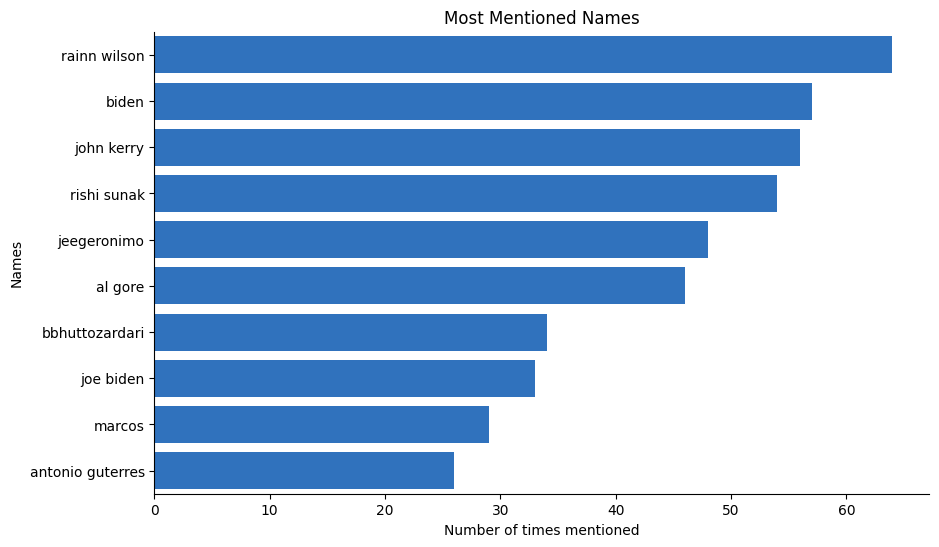

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_entities, x = 'count', y = 'text', color ='#1870d5')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

ax.set(xlabel = 'Number of times mentioned', ylabel = 'Names', title = 'Most Mentioned Names')